# Exploratory Data Analysis: Stanford AI Cars Database

### Background
Stanford University produced a dataset of cars for image recognition (part of a Kaggle competition as well). In this project, I will attempt to build an accurate classifier to determine the make and model of a given image of a car using a Convolutional Neural Network.

In [64]:
import pandas as pd
import numpy as np
from scipy import stats
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## Load Data

In [43]:
# For each car, find the number of images (both training and testing sets)

import os
root_dir = "C:/Users/himi6/Google Drive/All documents/Personal Projects/deep_learning/car_image_classification/car_data/train"

file_dict = {}

for dir_, _, files in os.walk(root_dir):
    rel_dir = os.path.relpath(dir_, root_dir)
    file_dict.setdefault(rel_dir, len(files))

file_dict.pop('.')

0

## View Sample Images from Dataset

In [78]:
test_image1 = image.load_img('../car_data/train/Acura TL Sedan 2012/00002.jpg', target_size=(150, 225))
test_image2 = image.load_img('../car_data/train/Acura TL Sedan 2012/00740.jpg', target_size=(150, 225))

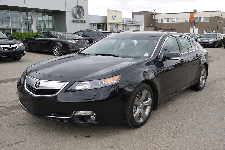

In [79]:
test_image1

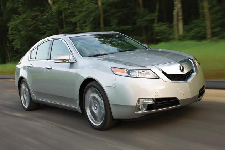

In [80]:
test_image2

## Summary Statistics

In [83]:
car_max_name = max(file_dict, key=file_dict.get)
car_max_num_images = file_dict[car_max_name]

car_min_name = min(file_dict, key=file_dict.get)
car_min_num_images = file_dict[car_min_name]

img_count_list = list(file_dict.values())

mean_num_images = np.mean(img_count_list)

In [84]:
print(f"{car_max_name} has the most number of images with {car_max_num_images}")
print(f"{car_min_name} has the least number of images with {car_min_num_images}")
print(f"The average number of images per car is {round(mean_num_images, 2)}")

GMC Savana Van 2012 has the most number of images with 68
Hyundai Accent Sedan 2012 has the least number of images with 24
The average number of images per car is 41.55


In [85]:
stats.describe(img_count_list)

DescribeResult(nobs=196, minmax=(24, 68), mean=41.55102040816327, variance=18.78199895342752, skewness=0.13813066424803216, kurtosis=7.837848188860725)

## Data Visualization

#### Lets visualize the distribution of the number of images for each car make & model

In [81]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from plotly.tools import get_embed
from plotly import offline

In [107]:
img_count_list.sort()
data = [go.Histogram(x=img_count_list)]

layout = go.Layout(
    title=go.layout.Title(
        text='Histogram of # of Images Distribution for Cars Dataset',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Number of Images',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Number of Observations',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

fig1 = go.Figure(data=data, layout=layout)
py.iplot(fig1, filename='image-count-histogram')

In [110]:
offline.plot(fig1, filename='../plots/image_count_histogram.html')
offline.plot(fig1, filename='../../../hm9464.github.io/site/plots/image_count_histogram.html')

'../../../hm9464.github.io/site/plots/image_count_histogram.html'